### Linear Regression

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Fetch the dataset
housing_data = fetch_california_housing()
X = housing_data.data
y = housing_data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error

# Calculate the performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print('Mean Squared Error:', mse)

Mean Squared Error: 0.5558915986952422


Ridge

In [4]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0).fit(X_train, y_train)

Lasso

In [12]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1).fit(X_train, y_train)

# counting the number of features that have non-zero coef
print("Number of features used:", np.sum(lasso.coef_ != 0))

Number of features used: 3


### Logistic Regression

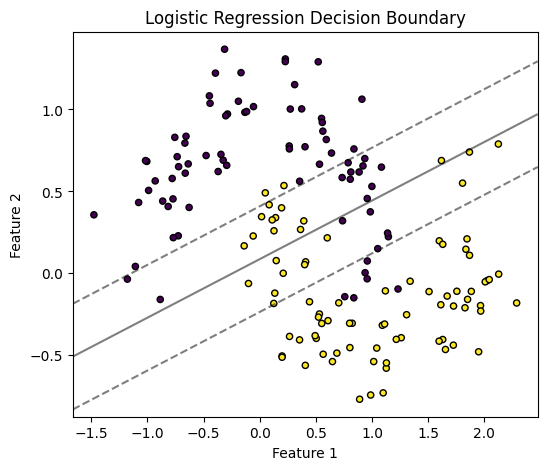

Model accuracy: 0.85


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate a dataset with a non-linear decision boundary
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Split the standardized dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model
log_reg = LogisticRegression().fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Plot the decision boundary
plt.figure(figsize=(6, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=20)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = log_reg.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Label the plot
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Print the accuracy
print('Model accuracy:', accuracy)